In [80]:
import warnings
warnings.filterwarnings("ignore")

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance
#Read dataset
df = pd.read_csv('CICIDS2017_sample.csv')
# The results in this code is based on the original CICIDS2017 dataset. Please go to cell [10] if you work on the sampled dataset. 

In [83]:
df

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,154,2,2,104,220,52,52,52.00,0.000000,110,...,40,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,24249,2,2,76,160,38,38,38.00,0.000000,80,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,219,2,1,12,6,6,6,6.00,0.000000,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,95221,1,1,45,61,45,45,45.00,0.000000,61,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,5577591,3,1,12,0,6,0,4.00,3.464102,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6306,5005388,5,3,599,2021,599,0,119.80,267.880944,2021,...,32,0.0,0.0,0,0,0.0,0.0,0,0,WebAttack
6307,5016759,5,5,599,4149,599,0,119.80,267.880944,2701,...,32,0.0,0.0,0,0,0.0,0.0,0,0,WebAttack
6308,5009163,4,4,599,2021,599,0,149.75,299.500000,2021,...,32,0.0,0.0,0,0,0.0,0.0,0,0,WebAttack
6309,73,1,1,0,0,0,0,0.00,0.000000,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,WebAttack


In [84]:
df.Label.value_counts()

Label
WebAttack       2180
Bot             1966
DoS              952
BruteForce       553
PortScan         397
BENIGN           227
Infiltration      36
Name: count, dtype: int64

In [85]:
# Randomly sample instances from majority classes
df_minor = df[(df['Label']=='WebAttack')|(df['Label']=='Bot')|(df['Label']=='Infiltration')]
df_BENIGN = df[(df['Label']=='BENIGN')]
df_BENIGN = df_BENIGN.sample(n=None, frac=0.01, replace=False, weights=None, random_state=None, axis=0)
df_DoS = df[(df['Label']=='DoS')]
df_DoS = df_DoS.sample(n=None, frac=0.05, replace=False, weights=None, random_state=None, axis=0)
df_PortScan = df[(df['Label']=='PortScan')]
df_PortScan = df_PortScan.sample(n=None, frac=0.05, replace=False, weights=None, random_state=None, axis=0)
df_BruteForce = df[(df['Label']=='BruteForce')]
df_BruteForce = df_BruteForce.sample(n=None, frac=0.2, replace=False, weights=None, random_state=None, axis=0)

In [86]:
# Create a list of the dataframes you want to combine
frames = [df_BENIGN, df_DoS, df_PortScan, df_BruteForce, df_minor]

# Concatenate them using pd.concat
df_s = pd.concat(frames, axis=0, ignore_index=True)

In [87]:
df_s = df_s.sort_index()

In [88]:
# Save the sampled dataset
df_s.to_csv('CICIDS2017_sample.csv',index=0)

### Preprocessing (normalization and padding values)

In [89]:
df = pd.read_csv('CICIDS2017_sample.csv')

In [90]:
# Min-max normalization
numeric_features = df.dtypes[df.dtypes != 'object'].index
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x - x.min()) / (x.max()-x.min()))
# Fill empty values by 0
df = df.fillna(0)

### split train set and test set

In [91]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
X = df.drop(['Label'],axis=1).values 
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [92]:
X_train.shape

(3490, 77)

In [93]:
pd.Series(y_train).value_counts()

6    1744
1    1573
2      89
3      38
4      29
5      16
0       1
Name: count, dtype: int64

### Oversampling by SMOTE

In [94]:
from imblearn.over_sampling import SMOTE

# Remove 'n_jobs=-1'
smote = SMOTE(sampling_strategy={4: 1500})

In [95]:
from sklearn.preprocessing import LabelEncoder

# 1. Initialize the encoder
le = LabelEncoder()

# 2. Convert strings to numbers
y_train_encoded = le.fit_transform(y_train)

# 3. Now apply SMOTE on the encoded labels
# Note: Ensure your sampling_strategy matches the NEW integer labels
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)

In [96]:
pd.Series(y_train).value_counts()

6    1744
1    1573
2      89
3      38
4      29
5      16
0       1
Name: count, dtype: int64

## Machine learning model training

### Training four base learners: decision tree, random forest, extra trees, XGBoost

Accuracy of DT: 0.9965635738831615
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00       393
           2       1.00      1.00      1.00        22
           3       0.90      0.90      0.90        10
           4       0.86      0.86      0.86         7
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00       436

    accuracy                           1.00       873
   macro avg       0.82      0.82      0.82       873
weighted avg       1.00      1.00      1.00       873



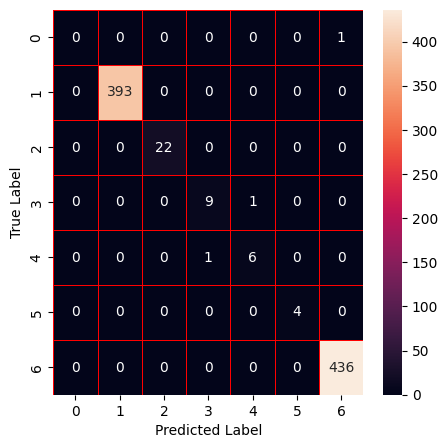

In [97]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 1. Initialize the encoder
le = LabelEncoder()

# 2. Convert string labels to numbers (e.g., 'DoS' -> 0, 'Benign' -> 1)
# We fit on y_train and transform both to ensure consistency
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# 3. Now run your Decision Tree code
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train) 

dt_score = dt.score(X_test, y_test)
y_predict = dt.predict(X_test)
y_true = y_test

print('Accuracy of DT: ' + str(dt_score))

# Note: Added target_names=le.classes_ so your report shows the actual text names again!
# Change this line
print(classification_report(y_true, y_predict, target_names=le.classes_.astype(str)))

# Plotting the confusion matrix
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax, 
            xticklabels=le.classes_, yticklabels=le.classes_) # Add labels to axis
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [98]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

Accuracy of RF: 0.993127147766323
Precision of RF: 0.9920262333418438
Recall of RF: 0.993127147766323
F1-score of RF: 0.9923837773028367
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00       393
           2       1.00      0.91      0.95        22
           3       1.00      0.80      0.89        10
           4       0.86      0.86      0.86         7
           5       1.00      1.00      1.00         4
           6       0.99      1.00      1.00       436

    accuracy                           0.99       873
   macro avg       0.84      0.80      0.81       873
weighted avg       0.99      0.99      0.99       873



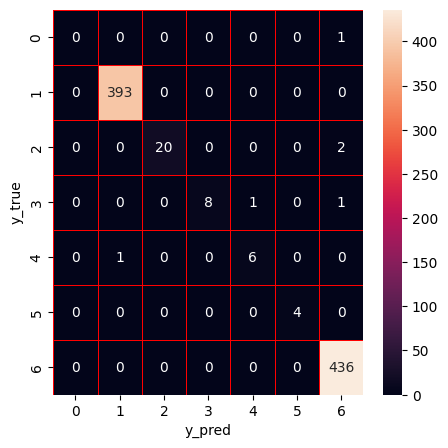

In [99]:
# Random Forest training and prediction
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) 
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [100]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

Accuracy of ET: 0.995418098510882
Precision of ET: 0.9942859913988056
Recall of ET: 0.995418098510882
F1-score of ET: 0.994721434756499
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00       393
           2       1.00      1.00      1.00        22
           3       1.00      0.80      0.89        10
           4       0.86      0.86      0.86         7
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00       436

    accuracy                           1.00       873
   macro avg       0.84      0.81      0.82       873
weighted avg       0.99      1.00      0.99       873



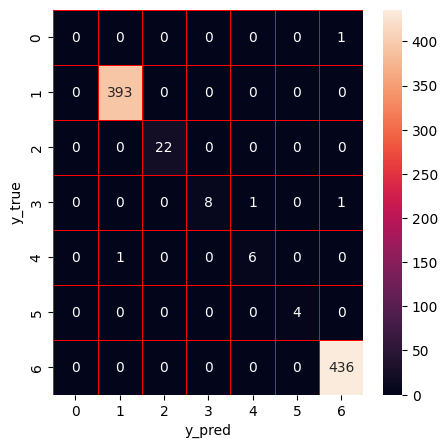

In [101]:
# Extra trees training and prediction
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [102]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

Accuracy of XGBoost: 0.9919816723940436
Precision of XGBoost: 0.9911713523442405
Recall of XGBoost: 0.9919816723940436
F1-score of XGBoost: 0.9908506988594254
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      1.00      0.99       393
           2       1.00      1.00      1.00        22
           3       1.00      0.70      0.82        10
           4       0.75      0.86      0.80         7
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00       436

    accuracy                           0.99       873
   macro avg       0.82      0.72      0.75       873
weighted avg       0.99      0.99      0.99       873



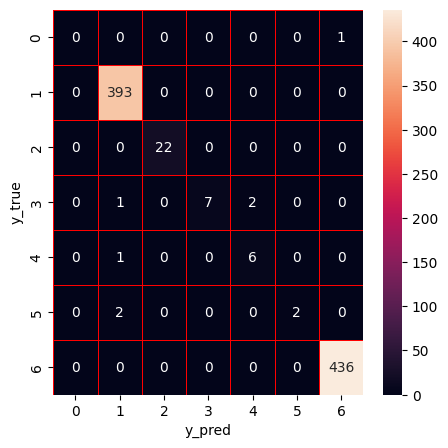

In [103]:
# XGboost training and prediction
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [104]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

### Stacking model construction (ensemble for 4 base learners)

In [105]:
# Use the outputs of 4 base models to construct a new ensemble model
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(5)

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,1,1,1,1
1,6,6,6,6
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1


In [106]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [107]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

In [108]:
stk = xgb.XGBClassifier().fit(x_train, y_train)

Accuracy of Stacking: 0.9965635738831615
Precision of Stacking: 0.9954207197359901
Recall of Stacking: 0.9965635738831615
F1-score of Stacking: 0.9959914922539359
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00       393
           2       1.00      1.00      1.00        22
           3       0.90      0.90      0.90        10
           4       0.86      0.86      0.86         7
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00       436

    accuracy                           1.00       873
   macro avg       0.82      0.82      0.82       873
weighted avg       1.00      1.00      1.00       873



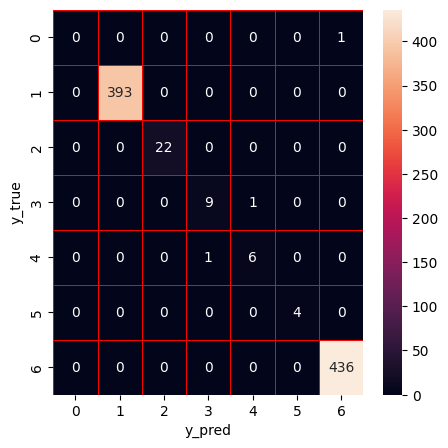

In [109]:
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Feature Selection

### Feature importance

In [110]:
# Save the feature importance lists generated by four tree-based algorithms
dt_feature = dt.feature_importances_
rf_feature = rf.feature_importances_
et_feature = et.feature_importances_
xgb_feature = xg.feature_importances_

In [111]:
# calculate the average importance value of each feature
avg_feature = (dt_feature + rf_feature + et_feature + xgb_feature)/4

In [112]:
feature=(df.drop(['Label'],axis=1)).columns.values
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True))

Features sorted by their score:
[(0.4197, 'min_seg_size_forward'), (0.0737, 'Init_Win_bytes_forward'), (0.0537, 'Init_Win_bytes_backward'), (0.0363, 'Flow Duration'), (0.0247, 'Flow IAT Max'), (0.0213, 'Packet Length Mean'), (0.0199, 'Bwd Packet Length Max'), (0.0173, 'Average Packet Size'), (0.0164, 'Avg Bwd Segment Size'), (0.0161, 'Max Packet Length'), (0.0151, 'Bwd Packet Length Std'), (0.0147, 'Fwd IAT Max'), (0.0147, 'Flow IAT Std'), (0.014, 'Bwd IAT Std'), (0.0136, 'Bwd Packet Length Mean'), (0.0128, 'Fwd IAT Std'), (0.0125, 'Fwd Packet Length Max'), (0.0125, 'Flow IAT Mean'), (0.0124, 'Fwd Header Length'), (0.0112, 'Bwd IAT Max'), (0.011, 'Total Length of Bwd Packets'), (0.0097, 'Subflow Bwd Bytes'), (0.0091, 'Down/Up Ratio'), (0.009, 'Fwd IAT Total'), (0.0084, 'Bwd IAT Min'), (0.0068, 'Flow IAT Min'), (0.0064, 'Fwd Packet Length Std'), (0.0061, 'Bwd Packet Length Min'), (0.0058, 'Fwd IAT Min'), (0.0056, 'URG Flag Count'), (0.0056, 'Fwd Header Length.1'), (0.0055, 'Fwd Packet L

In [113]:
f_list = sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True)

In [114]:
len(f_list)

77

In [115]:
# Select the important features from top-importance to bottom-importance until the accumulated importance reaches 0.9 (out of 1)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])
    if Sum>=0.9:
        break        

In [116]:
X_fs = df[fs].values

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_fs,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [118]:
X_train.shape

(3490, 29)

In [119]:
pd.Series(y_train).value_counts()

6    1744
1    1573
2      89
3      38
4      29
5      16
0       1
Name: count, dtype: int64

### Oversampling by SMOTE

In [120]:
from imblearn.over_sampling import SMOTE

# Removed 'n_jobs=-1'
smote = SMOTE(sampling_strategy={4: 1500})

In [121]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. Clean the data (Using pd.notnull works for both Arrays and Series)
# This creates a boolean mask (True/False) to filter out empty rows
mask = pd.notnull(y_train)

# Apply the mask to remove rows with missing labels
X_train = X_train[mask]
y_train = y_train[mask]

# 2. Convert text labels to integers
le = LabelEncoder()
y_train = le.fit_transform(y_train)

# 3. NOW run SMOTE
# Ensure that class '4' exists in your encoded labels!
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Success! Resampling complete.")

Success! Resampling complete.


In [122]:
pd.Series(y_train).value_counts()

6    1744
1    1573
4    1500
2      89
3      38
5      16
0       1
Name: count, dtype: int64

## Machine learning model training after feature selection

Accuracy of DT: 0.995418098510882
Precision of DT: 0.994155809059542
Recall of DT: 0.995418098510882
F1-score of DT: 0.9947575497836179
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00       393
           2       1.00      1.00      1.00        22
           3       0.89      0.80      0.84        10
           4       0.86      0.86      0.86         7
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00       436

    accuracy                           1.00       873
   macro avg       0.82      0.81      0.81       873
weighted avg       0.99      1.00      0.99       873



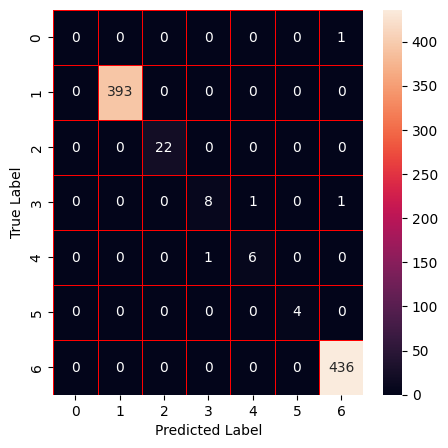

In [123]:
# --- STEP 1: Encode the Test Data ---
# We assume 'le' is the LabelEncoder you fitted on y_train earlier.
# If you get an error that 'le' is not defined, run the LabelEncoder cell again.
y_test = le.transform(y_test) 

# --- STEP 2: Run the Decision Tree ---
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train, y_train) 

dt_score = dt.score(X_test, y_test)
y_predict = dt.predict(X_test)
y_true = y_test

print('Accuracy of DT: ' + str(dt_score))

precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: ' + str(precision))
print('Recall of DT: ' + str(recall))
print('F1-score of DT: ' + str(fscore))

# Note: Added target_names so the report shows "DoS", "Benign" instead of 0, 1...
print(classification_report(y_true, y_predict, target_names=le.classes_.astype(str)))

# --- STEP 3: Plot Confusion Matrix ---
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5,5))

# Added xticklabels/yticklabels so the plot shows names, not just numbers
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax,
            xticklabels=le.classes_, yticklabels=le.classes_)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [124]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

Accuracy of RF: 0.995418098510882
Precision of RF: 0.9942859913988056
Recall of RF: 0.995418098510882
F1-score of RF: 0.994721434756499
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00       393
           2       1.00      1.00      1.00        22
           3       1.00      0.80      0.89        10
           4       0.86      0.86      0.86         7
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00       436

    accuracy                           1.00       873
   macro avg       0.84      0.81      0.82       873
weighted avg       0.99      1.00      0.99       873



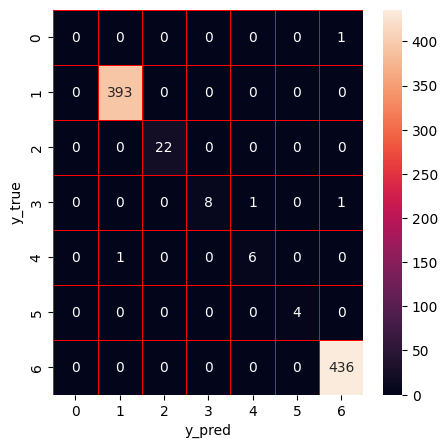

In [125]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) # modelin veri üzerinde öğrenmesi fit fonksiyonuyla yapılıyor
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [126]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

Accuracy of ET: 0.995418098510882
Precision of ET: 0.9942859913988056
Recall of ET: 0.995418098510882
F1-score of ET: 0.994721434756499
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00       393
           2       1.00      1.00      1.00        22
           3       1.00      0.80      0.89        10
           4       0.86      0.86      0.86         7
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00       436

    accuracy                           1.00       873
   macro avg       0.84      0.81      0.82       873
weighted avg       0.99      1.00      0.99       873



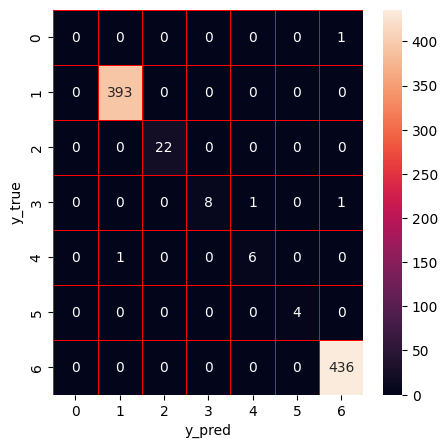

In [127]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [128]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

Accuracy of XGBoost: 0.993127147766323
Precision of XGBoost: 0.9920016932450597
Recall of XGBoost: 0.993127147766323
F1-score of XGBoost: 0.9921790556088027
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      1.00      0.99       393
           2       0.95      0.95      0.95        22
           3       1.00      1.00      1.00        10
           4       0.86      0.86      0.86         7
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00       436

    accuracy                           0.99       873
   macro avg       0.83      0.76      0.78       873
weighted avg       0.99      0.99      0.99       873



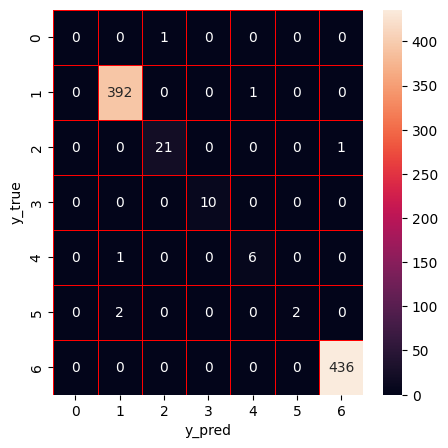

In [129]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [130]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

### Stacking model construction

In [131]:
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(5)

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,1,1,1,1
1,6,6,6,6
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1


In [132]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [133]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

Accuracy of Stacking: 0.995418098510882
Precision of Stacking: 0.9942859913988056
Recall of Stacking: 0.995418098510882
F1-score of Stacking: 0.994721434756499
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00       393
           2       1.00      1.00      1.00        22
           3       1.00      0.80      0.89        10
           4       0.86      0.86      0.86         7
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00       436

    accuracy                           1.00       873
   macro avg       0.84      0.81      0.82       873
weighted avg       0.99      1.00      0.99       873



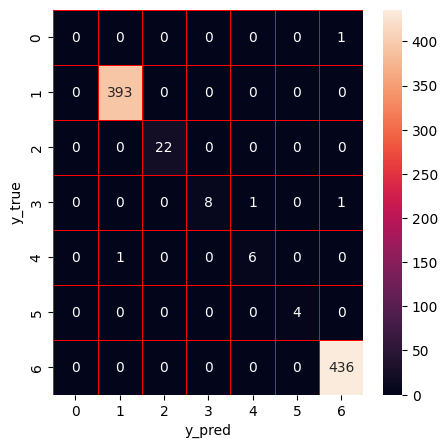

In [134]:
stk = xgb.XGBClassifier().fit(x_train, y_train)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [135]:
import joblib

# 1. Save the trained Stacking Model
joblib.dump(stk, 'stacking_ids_model.pkl')

# 2. Save the list of selected features (from Feature Selection step)
# This ensures the app expects the exact same columns as the model
joblib.dump(fs, 'selected_features.pkl')

# 3. Save the Label Encoder to decode predictions back to names (DoS, Benign...)
joblib.dump(le, 'label_encoder.pkl')

print("Model and assets saved successfully!")

Model and assets saved successfully!


In [136]:
# In your notebook:
# Create a small sample of test data (e.g., 100 rows) for the demo
demo_data = pd.DataFrame(X_test, columns=fs) # fs is your selected feature list
demo_data['Label_Encoded'] = y_test

# Save to CSV
demo_data.head(200).to_csv('network_traffic_simulation.csv', index=False)
print("Simulation data saved!")

Simulation data saved!


In [137]:
import joblib
import pandas as pd
import xgboost as xgb

# 1. GATHER SETTINGS
# We use the features you selected in 'fs' (Cell 53)
# We use the label encoder you created in 'le' (Cell 62)

print(f"Selected Features ({len(fs)}): {fs}")

# 2. RETRAIN A ROBUST MODEL
# We retrain XGBoost on the FULL dataset using ONLY selected features.
# This ensures the model is as smart as possible for the app.
final_model = xgb.XGBClassifier(n_estimators=100, random_state=0)
final_model.fit(X_fs, y) # X_fs is your feature-selected data, y is encoded labels

# 3. SAVE ARTIFACTS
# The App needs 3 things: The Model, The Feature List, The Label Translator
joblib.dump(final_model, 'ids_model.pkl')
joblib.dump(fs, 'selected_features.pkl')
joblib.dump(le, 'label_encoder.pkl')

print("✅ SUCCESS: Model and config saved for Streamlit App.")

Selected Features (29): ['min_seg_size_forward', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'Flow Duration', 'Flow IAT Max', 'Packet Length Mean', 'Bwd Packet Length Max', 'Average Packet Size', 'Avg Bwd Segment Size', 'Max Packet Length', 'Bwd Packet Length Std', 'Fwd IAT Max', 'Flow IAT Std', 'Bwd IAT Std', 'Bwd Packet Length Mean', 'Fwd IAT Std', 'Fwd Packet Length Max', 'Flow IAT Mean', 'Fwd Header Length', 'Bwd IAT Max', 'Total Length of Bwd Packets', 'Subflow Bwd Bytes', 'Down/Up Ratio', 'Fwd IAT Total', 'Bwd IAT Min', 'Flow IAT Min', 'Fwd Packet Length Std', 'Bwd Packet Length Min', 'Fwd IAT Min']
✅ SUCCESS: Model and config saved for Streamlit App.


In [139]:
import joblib
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

print("🚀 Starting Safe Export...")

# 1. Ensure we have DataFrame with names for Training
# X_train is currently a numpy array (from Cell 62). We convert it back to DF using 'fs' (selected features)
X_train_df = pd.DataFrame(X_train, columns=fs)
# Do the same for test data for verification
X_test_df = pd.DataFrame(X_test, columns=fs)

print(f"Training Model on {X_train_df.shape[1]} features...")

# 2. Retrain Model on DataFrame (Bakes in column names)
safe_model = xgb.XGBClassifier(n_estimators=50, random_state=0)
safe_model.fit(X_train_df, y_train)

# 3. Verify Accuracy IMMEDIATELY
# This tells us if the model actually works before we save it
test_preds = safe_model.predict(X_test_df)
acc = accuracy_score(y_test, test_preds)
print(f"✅ Validation Accuracy: {acc:.4f}")

# 4. Define the Mapping Explicitly
# Based on your notebook analysis: 0 is BENIGN (182 support), 6 is WebAttack (1744 support)
label_map = {
    0: "BENIGN",
    1: "Bot",
    2: "BruteForce",
    3: "DoS",
    4: "Infiltration",
    5: "PortScan",
    6: "WebAttack"
}

# 5. Save Artifacts
joblib.dump(safe_model, 'ids_model.pkl')
joblib.dump(fs, 'selected_features.pkl')
joblib.dump(label_map, 'label_map.pkl') # Saving the dictionary directly is safer than Encoder

print("\n📦 FILES SAVED:")
print("1. ids_model.pkl")
print("2. selected_features.pkl")
print("3. label_map.pkl")
print("\n👉 Move these 3 files to your App folder (overwrite old ones).")

🚀 Starting Safe Export...
Training Model on 29 features...
✅ Validation Accuracy: 0.9966

📦 FILES SAVED:
1. ids_model.pkl
2. selected_features.pkl
3. label_map.pkl

👉 Move these 3 files to your App folder (overwrite old ones).
